In [33]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

In [34]:
(x_train, _), (x_test, _) = mnist.load_data()
x_train = x_train/255.
x_test = x_test/255.
x_train = x_train.reshape((len(x_train), 784))
x_test = x_test.reshape((len(x_test), 784))

x_train.shape, x_test.shape

((60000, 784), (10000, 784))

In [35]:
# compress 784->32->784

inputs = Input(shape=(784,))
code = Dense(32, activation='relu')(inputs)
outputs = Dense(784, activation='sigmoid')(code)

autoencoder = Model(inputs, outputs)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.summary()

Model: "model_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_8 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense_6 (Dense)              (None, 32)                25120     
_________________________________________________________________
dense_7 (Dense)              (None, 784)               25872     
Total params: 50,992
Trainable params: 50,992
Non-trainable params: 0
_________________________________________________________________


In [36]:
# encoder model, shared the first half nn.
encoder = Model(inputs, code)
encoder.summary()

# decoder model, create an new input layer and connect it to the last half nn.
d_inputs = Input(shape=(32,))
d_outputs = autoencoder.layers[-1](d_inputs)
decoder = Model(d_inputs, d_outputs)
decoder.summary()

Model: "model_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_8 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense_6 (Dense)              (None, 32)                25120     
Total params: 25,120
Trainable params: 25,120
Non-trainable params: 0
_________________________________________________________________
Model: "model_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_9 (InputLayer)         [(None, 32)]              0         
_________________________________________________________________
dense_7 (Dense)              (None, 784)               25872     
Total params: 25,872
Trainable params: 25,872
Non-trainable params: 0
_________________________________________________________________


In [37]:
history = autoencoder.fit(x_train, x_train, epochs=25, batch_size=256, shuffle=True, \
    validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/25
60000/60000 [==============================] - 3s 57us/sample - loss: 0.2803 - val_loss: 0.1904
Epoch 2/25
60000/60000 [==============================] - 3s 51us/sample - loss: 0.1713 - val_loss: 0.1538
Epoch 3/25
60000/60000 [==============================] - 3s 51us/sample - loss: 0.1448 - val_loss: 0.1341
Epoch 4/25
60000/60000 [==============================] - 3s 51us/sample - loss: 0.1289 - val_loss: 0.1213
Epoch 5/25
60000/60000 [==============================] - 3s 52us/sample - loss: 0.1185 - val_loss: 0.1131
Epoch 6/25
60000/60000 [==============================] - 3s 52us/sample - loss: 0.1116 - val_loss: 0.1074
Epoch 7/25
60000/60000 [==============================] - 3s 51us/sample - loss: 0.1066 - val_loss: 0.1032
Epoch 8/25
60000/60000 [==============================] - 3s 51us/sample - loss: 0.1028 - val_loss: 0.0999
Epoch 9/25
60000/60000 [==============================] - 3s 52us/sample - loss: 0.0999 - val_

In [38]:
history.history.keys()

dict_keys(['loss', 'val_loss'])

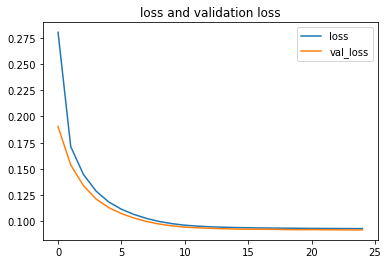

In [40]:
#plt.figure(figsize=(8,8))
plt.title('loss and validation loss')
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(labels=['loss', 'val_loss'], loc='best')
plt.show()

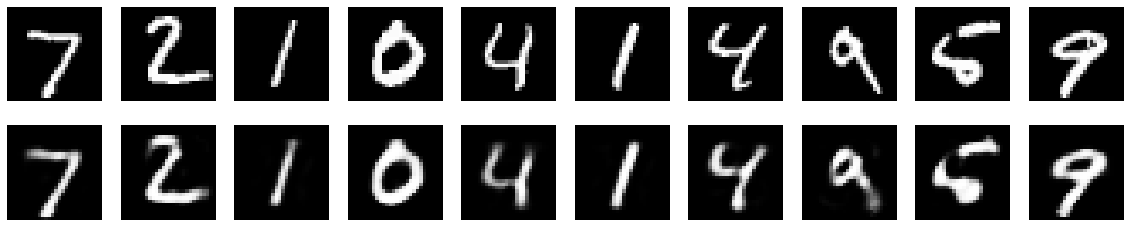

In [56]:
plt.figure(figsize=(20, 4))

for i in range(10):
    plt.subplot(2, 10, i+1)
    plt.imshow(x_test[i].reshape(28,28))
    plt.axis('off')
    
    plt.subplot(2, 10, 10+i+1)
    compressed_code = encoder.predict( np.array([x_test[i]]) )
    decompressed_img = decoder.predict( compressed_code )
    plt.imshow( decompressed_img.reshape(28,28) )
    plt.axis('off')
    
plt.show()

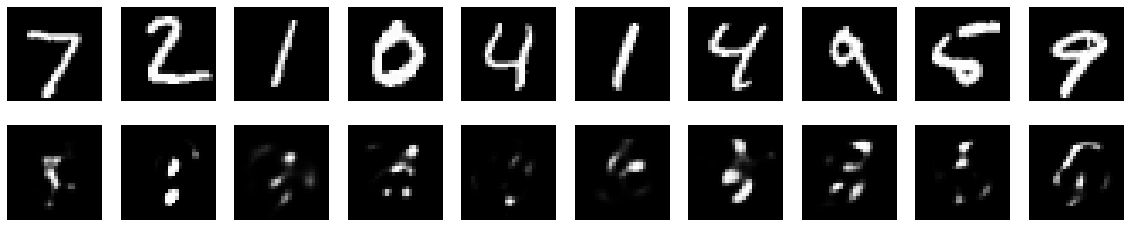

In [58]:
plt.figure(figsize=(20, 4))

for i in range(10):
    plt.subplot(2, 10, i+1)
    plt.imshow(x_test[i].reshape(28,28))
    plt.axis('off')
    
    plt.subplot(2, 10, 10+i+1)
    compressed_code = encoder.predict( np.array([x_test[i]]) )
    np.random.shuffle(compressed_code[0]) # shuffling then generating images doesn't make sense
    decompressed_img = decoder.predict( compressed_code )
    plt.imshow( decompressed_img.reshape(28,28) )
    plt.axis('off')
    
plt.show()